In [3]:
import numpy as np
import pandas as pd 
import tensorflow as tf

In [4]:
import yaml

In [6]:
import gdown

In [7]:
import zipfile
from PIL import Image
import io
import cv2

In [29]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = 'train_images.zip'
extract_folder = 'train_images'  # Folder to extract to

# Create a directory to extract the files if it doesn't exist
os.makedirs(extract_folder, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print(f"Extracted files to {extract_folder}")


Extracted files to train_images


In [30]:
# List the files in the extracted folder
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)


Extracted files: ['000000.jpg', '000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '000010.jpg', '000011.jpg', '000012.jpg', '000013.jpg', '000014.jpg', '000015.jpg', '000016.jpg', '000017.jpg', '000018.jpg', '000019.jpg', '000020.jpg', '000021.jpg', '000022.jpg', '000023.jpg', '000024.jpg', '000025.jpg', '000026.jpg', '000027.jpg', '000028.jpg', '000029.jpg', '000030.jpg', '000031.jpg', '000032.jpg', '000033.jpg', '000034.jpg', '000035.jpg', '000036.jpg', '000037.jpg', '000038.jpg', '000039.jpg', '000040.jpg', '000041.jpg', '000042.jpg', '000043.jpg', '000044.jpg', '000045.jpg', '000046.jpg', '000047.jpg', '000048.jpg', '000049.jpg', '000050.jpg', '000051.jpg', '000052.jpg', '000053.jpg', '000054.jpg', '000055.jpg', '000056.jpg', '000057.jpg', '000058.jpg', '000059.jpg', '000060.jpg', '000061.jpg', '000062.jpg', '000063.jpg', '000064.jpg', '000065.jpg', '000066.jpg', '000067.jpg', '000068.jpg', '000069.jpg', '0

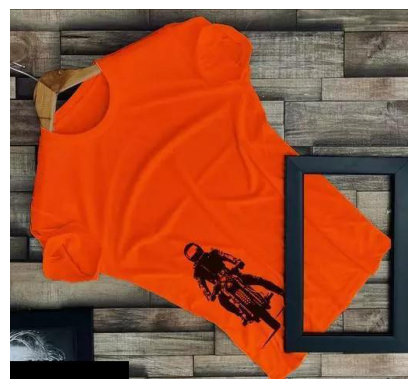

In [31]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and display an image from the extracted files
image_path = os.path.join(extract_folder, extracted_files[0])  # Load the first image
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()


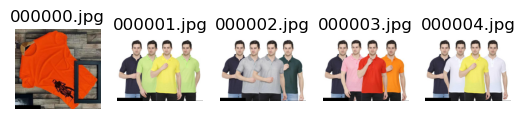

In [33]:
import matplotlib.pyplot as plt

image_folder = 'train_images'


# Loop through and display a few images
for i, filename in enumerate(os.listdir(image_folder)):
    if i < 5:  # Display the first 5 images
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        
        plt.subplot(1, 5, i + 1)  # Create a subplot
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels
        plt.title(filename)
    else:
        break

plt.show()

In [34]:
# Resize images
def resize_images(image_folder, size=(128, 128)):
    resized_images = []
    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        image = image.resize(size)
        resized_images.append(image)
    return resized_images

# Resize all images to 128x128
resized_images = resize_images(image_folder)

In [ ]:
def load_images_as_arrays(image_folder):
    images = []
    for filename in os.listdir(image_folder):
        image_path = os.path.join(image_folder, filename)
        image = Image.open(image_path)
        images.append(np.array(image))  # Convert to NumPy array
    return np.array(images)

# Load images as NumPy arrays
image_arrays = load_images_as_arrays(image_folder)

In [16]:
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv('train.csv')  
test_data = pd.read_csv('test.csv') 

In [24]:

image_dir= 'train_images'

In [25]:
from ultralytics import YOLO

In [26]:
yolo_model = YOLO('yolov8n.pt')

In [27]:
yolo_model.train(data=image_dir, epochs=10)

New https://pypi.org/project/ultralytics/8.3.18 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.17  Python-3.11.4 torch-2.5.0+cpu CPU (AMD Ryzen 3 3250U with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=train_images.zip, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

RuntimeError: Dataset 'train_images.zip' error  No YAML file found in 'C:\Users\annu\IdeaProjects\datasets\train_images'

In [38]:
# Run inference on a new image to get bounding boxes
results = yolo_model.predict('https://drive.google.com/file/d/1Ll9rSOg06Oa7D5FCiTKl1x0AzjogG6QW/view?usp=drive_link')

# Extract bounding boxes
boxes = results[0].boxes.xyxy  # Bounding boxes in XYXY format

ConnectionError: 1/1: https://drive.google.com/file/d/1Ll9rSOg06Oa7D5FCiTKl1x0AzjogG6QW/view?usp=drive_link... Failed to open https://drive.google.com/file/d/1Ll9rSOg06Oa7D5FCiTKl1x0AzjogG6QW/view?usp=drive_link

In [ ]:
image_path = 'train_first.jpg'
image = cv2.imread(image_path)

# Display the image
cv2.imshow('Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Function to crop bounding boxes from images
def crop_boxes(image, boxes):
    cropped_images = []
    for box in boxes:
        x_min, y_min, x_max, y_max = map(int, box)
        cropped_image = image[y_min:y_max, x_min:x_max]  # Crop image
        cropped_images.append(cropped_image)
    return cropped_images

# Crop regions of interest
cropped_images = crop_boxes(image, boxes)

In [ ]:
# YOLO inference (replace with actual prediction results)
boxes = [[50, 60, 200, 300], [120, 150, 400, 500]]  # Example bounding boxes [x_min, y_min, x_max, y_max]

# Draw bounding boxes on the image
for box in boxes:
    x_min, y_min, x_max, y_max = box
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

# Show the image with bounding boxes
cv2.imshow('Image with Boxes', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Resize the image to match YOLO input size (e.g., 640x640)
resized_image = cv2.resize(image, (640, 640))

# Normalize the image
normalized_image = resized_image / 255.0


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
transformer_model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased')

inputs = tokenizer(train_data['product_description'], padding=True, truncation=True, return_tensors='pt')
outputs = transformer_model(**inputs)

In [ ]:
# YOLO predictions on image
image_results = yolo_model.predict('https://drive.google.com/file/d/1Ll9rSOg06Oa7D5FCiTKl1x0AzjogG6QW/view?usp=drive_link')

# Transformer predictions on text
text_results = transformer_model(**tokenizer(test_data['product_description'], return_tensors='pt'))

# Combine YOLO and Transformer outputs
combined_results = combine(image_results, text_results)  # Define a function to merge results


In [ ]:
# Load ViT for image classification
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
vit_model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Preprocess cropped images for ViT
def preprocess_image(image):
    img_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert to PIL Image
    inputs = feature_extractor(images=img_pil, return_tensors="pt")
    return inputs

# Classify each cropped image using Vision Transformer
predicted_labels = []
for cropped_img in cropped_images:
    inputs = preprocess_image(cropped_img)
    outputs = vit_model(**inputs)
    predicted_labels.append(outputs.logits.argmax(-1).item())

print(f'Predicted labels for cropped regions: {predicted_labels}')


In [ ]:
# Placeholder for true labels from test data (use actual test data)
true_labels = test_data['label']  # Replace with your actual label column

# Calculate accuracy score
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')
